# Thinkful Prep Course Capstone: Cryptocurrencies <BR>



For the last couple years I’ve made fun, educational content on the internet. As a result, I’ve absorbed a perpetual string of insights from my own research and from my impressively smart audience. After about my third direct message passionately urging me to invest in Bitcoin, I decided to finally check into all the fuss. 

My preliminary reading convinced me that if I were to put a few dollars into a cryptocurrency, it would be best to diversify. After a bit more digging (and glorified guessing) the cryptocurrencies I felt would work best together in a portfolio would be Bitcoin, Ethereum, Ripple and NEM). What will the data reveal about my choices?

### __Section One: Exploring Data__

I found a fantastic dataset on Kaggle from user SRK comparing the historical prices of several leading cryptocurrencies. The data was scraped from CoinMarketCap, a leading data tracker, covering a span of just over four years. Each CSV file contains the date, open, high, low, close, volume and market cap from  April 28 2013 – Nov 7 2017. 

Let’s load this stuff up and create some simple summaries: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [5]:
bitcoin = pd.read_csv('bitcoin_price.csv')
ethereum = pd.read_csv('ethereum_price.csv')
ripple = pd.read_csv('ripple_price.csv')
nem = pd.read_csv('nem_price.csv')

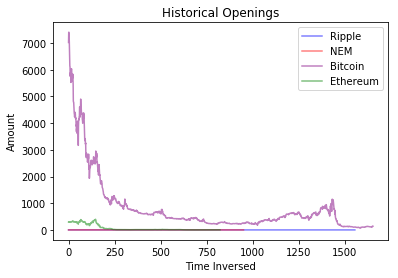

In [4]:
plt.plot(ripple['Open'], color='blue', alpha=0.5, label='Ripple') 
plt.plot(nem['Open'], color='red', alpha=0.5, label='NEM') 
plt.plot(bitcoin['Open'], color='purple', alpha=0.5, label='Bitcoin') 
plt.plot(ethereum['Open'], color='green', alpha=0.5, label='Ethereum')
plt.legend(loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Time Inversed')
plt.title('Historical Openings')
plt.show()

Ok, to no one’s surprise Bitcoin is hogging up the chart. There is a historical advantage to being first to market –especially as a disruptive technology.  Bitcoin has an impressive lead on price per share. (Or, in this case, maybe we should say price per unit.) There are some noticeable peaks followed by valleys growing exponentially –though this isn’t close to a complete story. 

Let’s remove Bitcoin for a minute and check on my other bets. 

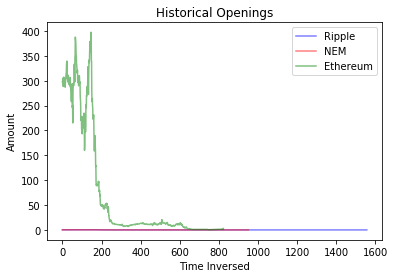

In [5]:
plt.plot(ripple['Open'], color='blue', alpha=0.5, label='Ripple') 
plt.plot(nem['Open'], color='red', alpha=0.5, label='NEM') 
plt.plot(ethereum['Open'], color='green', alpha=0.5, label='Ethereum')
plt.legend(loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Time Inversed')
plt.title('Historical Openings')
plt.show()

The plot thickens. Now Ethereum has the commanding lead. I wonder if this trend with continue...

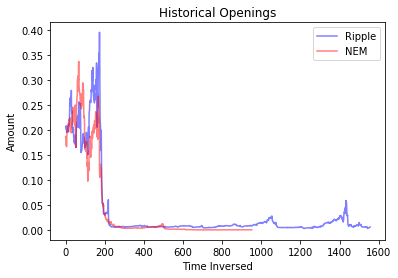

In [6]:
plt.plot(ripple['Open'], color='blue', alpha=0.5, label='Ripple') 
plt.plot(nem['Open'], color='red', alpha=0.5, label='NEM') 
plt.legend(loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Time Inversed')
plt.title('Historical Openings')
plt.show()

 Nope. NEM and Ripple are neck-and-neck. It’s worth noting again that I am only observing four different cryptocurrencies. There could be a clear “third runner up”, I just didn’t  pick it for the purposes of the project. Also, I am wondering if Ethereum’s lead is artificially inflated due to its newness.

Let’s summarize the data a different way:

In [6]:
bitcoin.describe()

,Open,High,Low,Close
count,1655.000000,1655.000000,1655.000000,1655.000000
mean,822.136127,845.812665,800.640906,826.285541
std,1108.245793,1147.157863,1077.408893,1119.053510
min,68.500000,74.560000,65.530000,68.430000
25%,263.850000,270.070000,260.030000,264.135000
50%,453.380000,458.200000,444.960000,453.380000
75%,743.485000,759.425000,731.785000,744.820000
max,7404.520000,7617.480000,7333.190000,7407.410000


In [7]:
ethereum.describe()

,Open,High,Low,Close
count,824.000000,824.000000,824.000000,824.000000
mean,68.758298,71.660280,65.790691,69.098058
std,112.338764,116.531656,107.616355,112.587105
min,0.431589,0.482988,0.420897,0.434829
25%,6.387500,6.642500,6.032500,6.460000
50%,11.390000,11.695000,11.080000,11.390000
75%,49.925000,51.090000,48.217500,50.032500
max,397.590000,414.760000,383.470000,401.490000


In [8]:
ripple.describe()

,Open,High,Low,Close
count,1557.000000,1557.000000,1557.000000,1557.000000
mean,0.035187,0.037066,0.033402,0.035313
std,0.071891,0.076119,0.067692,0.072019
min,0.002809,0.003082,0.002802,0.002810
25%,0.006019,0.006117,0.005933,0.006022
50%,0.007722,0.007897,0.007477,0.007722
75%,0.014201,0.014640,0.013732,0.014233
max,0.394931,0.435170,0.332222,0.394132


In [9]:
nem.describe()

,Open,High,Low,Close
count,952.000000,952.000000,952.000000,952.000000
mean,0.043319,0.046001,0.040716,0.043495
std,0.083314,0.088096,0.078360,0.083407
min,0.000086,0.000089,0.000079,0.000086
25%,0.000172,0.000183,0.000163,0.000172
50%,0.003569,0.003668,0.003413,0.003574
75%,0.011529,0.012502,0.010669,0.011657
max,0.336602,0.349178,0.312575,0.337213


Here we can see that that count is not the same for all of the currencies. The count represents the amount of days that particular currency has been traded.

### __Section Two: Analytical Questions__ <BR>

__1.) Is one currency growing quicker than the others?__

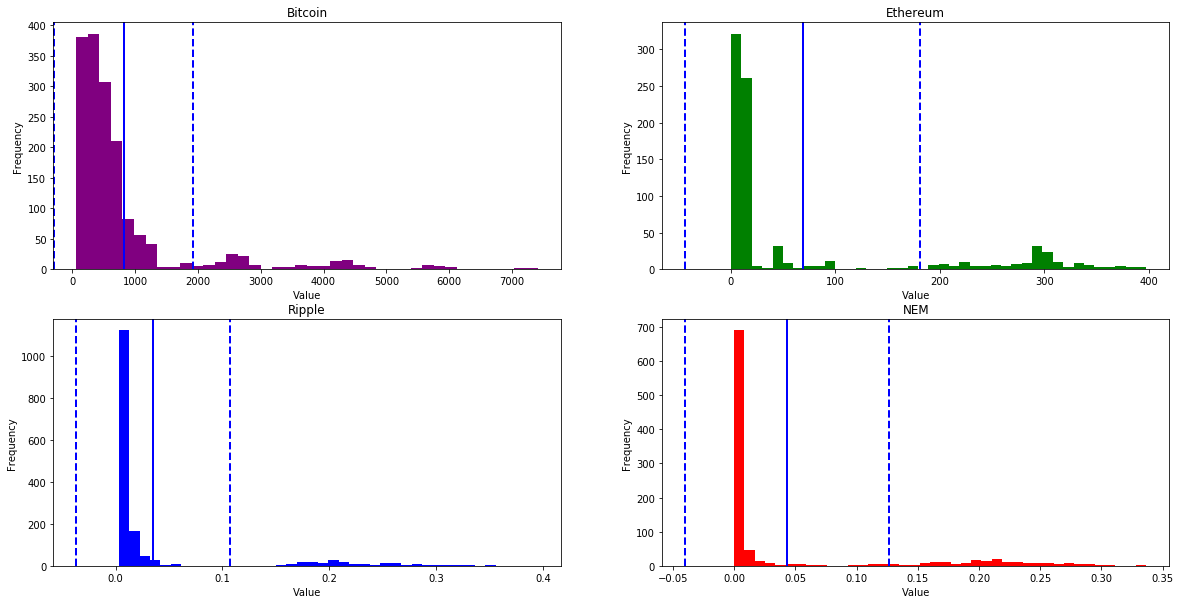

In [13]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(bitcoin['Open'], color='purple', bins=40)
plt.axvline((bitcoin['Open']).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline((bitcoin['Open']).mean() + (bitcoin['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline((bitcoin['Open']).mean()- (bitcoin['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Bitcoin')

plt.subplot(2, 2, 2)
plt.hist(ethereum['Open'], color='green', bins=40)
plt.axvline((ethereum['Open']).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline((ethereum['Open']).mean() + (ethereum['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline((ethereum['Open']).mean()- (ethereum['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Ethereum')

plt.subplot(2, 2, 3)
plt.hist(ripple['Open'], color='blue', bins=40)
plt.axvline((ripple['Open']).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline((ripple['Open']).mean() + (ripple['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline((ripple['Open']).mean()- (ripple['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Ripple')

plt.subplot(2, 2, 4)
plt.hist(nem['Open'], color='red', bins=40)
plt.axvline((nem['Open']).mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline((nem['Open']).mean() + (nem['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline((nem['Open']).mean()- (nem['Open']).std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('NEM')

plt.show()

In an ideal situation, we would see a heavy right-handed distribution on any one of these charts. That would be a clear winner. However, since cryptocurrency is a relatively new technology, we won’t have such luck. 

So, if we are stuck with a heavy left-handed distribution, another method could be to look at the standard deviation. Bitcoin, of course, has had some fantastic growth. For instance, its mean is resting nicely at $1000. But Ethereum has had some decent growth of its own.

The widened distance between Ethereum's mean and standard deviation markers is noticable in comparison to the other charts. It’s true that this doesn’t directly confirm continual positive growth; additionally, without any other information, this could also be an indicator of volatility. Regardless, this could warrant further investigation.  


__2.) Is the environment, or total market share, growing as a whole?__

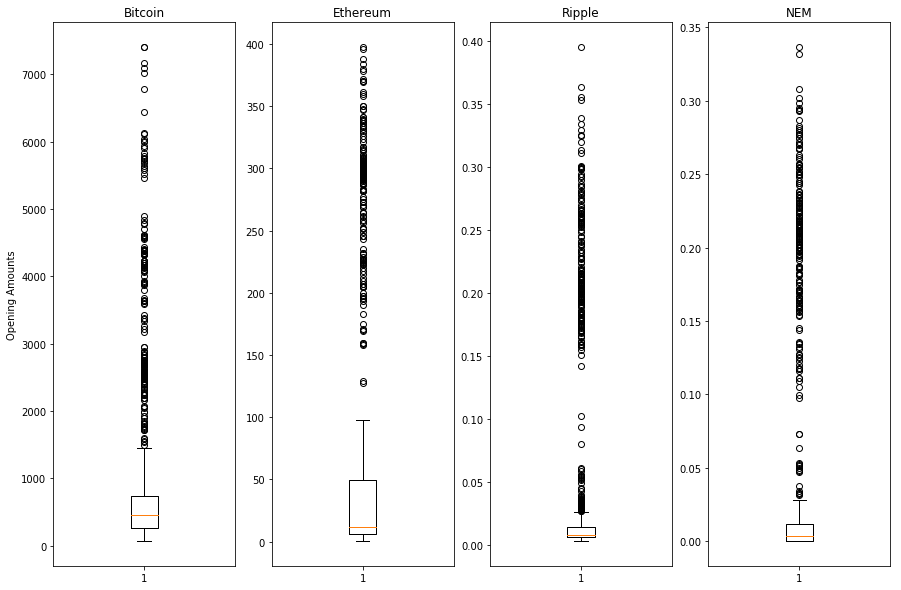

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.boxplot(bitcoin['Open'])
plt.ylabel('Opening Amounts')
plt.title('Bitcoin')

plt.subplot(1, 4, 2)
plt.boxplot(ethereum['Open'])
plt.title('Ethereum')

plt.subplot(1, 4, 3)
plt.boxplot(ripple['Open'])
plt.title('Ripple')

plt.subplot(1, 4, 4)
plt.boxplot(nem['Open'])
plt.title('NEM')

plt.show()

These currencies in no way make up a randomized sample. However, given these boxplots, it is possible to come up with some vague understandings. The first and third quartiles are at the bottom of every chart. Conversely, all whiskers on each chart are found at the top. In conjunction, these factors are indicators of a new and growing lifecycle for the cryptocurrency environment. 

__3.) Which one is more stable, NEM or Ripple?__

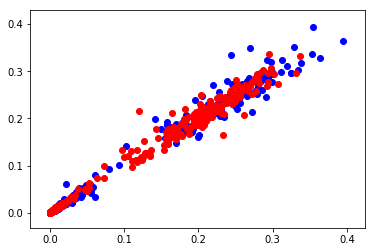

In [12]:
plt.scatter(
    x=ripple['Open'],
    y=ripple['Close'],
    color='blue')

plt.scatter(
    x=nem['Open'],
    y=nem['Close'],
    color='red')

plt.show()

For this question, let's define "stable" as "less risk". If a dot appears above or below the cluster, the currency's value had a meaningful fluxuation that day. It appears the Ripple (in blue) has had more of those days. It is worth noting that Ripple has been traded for almost two more years than NEM, so this visual alone may not be enough to make the call. 

###  __Section Three: Proposal For Future Research__

This brief overview hardly scratches the surface of Python, NumPy, Pandas and MatPlotLib's capabilities. First an foremost, I need to sharpen up my datatype conversion skills so that I can utilize some of the other variables in each dataframe. Second, these data are much more suited to a candlestick visualization. This would allow me to more clearly see day-to-day activiy. I would also like to learn how to plot moving averages on top of a candlestick plot to more clearly see financial trends. 

Text(0.5,1,'Bitcoin')

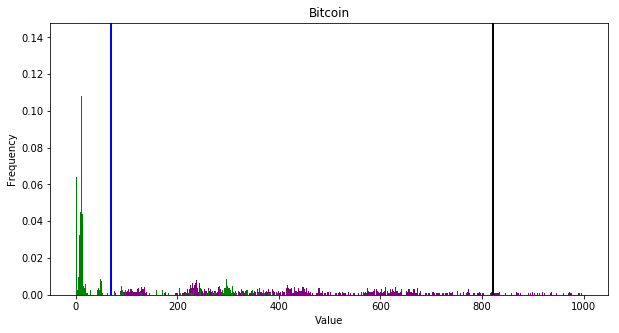

In [14]:
plt.figure(figsize=(10, 5))

plt.hist(bitcoin['Open'], color='purple', bins=np.arange(0, 1000), normed=True)
plt.axvline((bitcoin['Open']).mean(), color='black', linestyle='solid', linewidth=2)
plt.hist(ethereum['Open'], color='green', bins=np.arange(0, 1000), normed=True)
plt.axvline((ethereum['Open']).mean(), color='blue', linestyle='solid', linewidth=2)

plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Bitcoin')

In [3]:
from scipy.stats import ttest_ind

In [16]:
print(ttest_ind(bitcoin['Open'], ethereum['Open'], equal_var=False))

Ttest_indResult(statistic=27.374107859420008, pvalue=2.8716049654615738e-137)


Text(0.5,1,'Bitcoin')

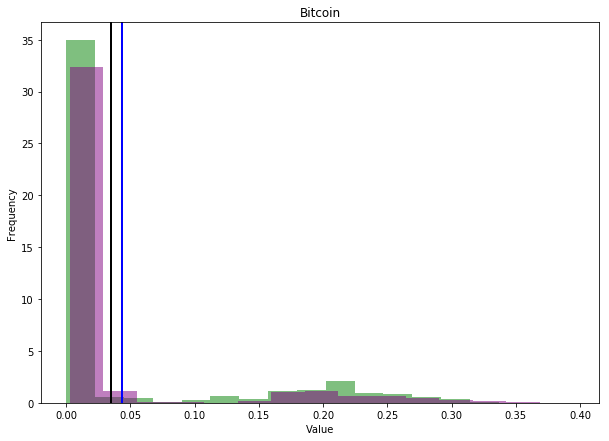

In [15]:
plt.figure(figsize=(10, 7))

plt.hist(nem['Open'], color='green', bins=15, alpha=0.5, normed=True)
plt.axvline((nem['Open']).mean(), color='blue', linestyle='solid', linewidth=2)

plt.hist(ripple['Open'], color='purple', bins=15, alpha=0.5, normed=True)
plt.axvline((ripple['Open']).mean(), color='black', linestyle='solid', linewidth=2)

plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Bitcoin')

In [16]:
print(ttest_ind(ripple['Open'], nem['Open'], equal_var=False))

Ttest_indResult(statistic=-2.4965075120086739, pvalue=0.012631723950936523)
